In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics

In [4]:
import math
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [5]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = pd.DataFrame(boston.target)
targets.columns = ['MEDV']

In [6]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
targets.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
features.shape

(506, 13)

In [10]:
features.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [11]:
targets.isna().sum()

MEDV    0
dtype: int64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

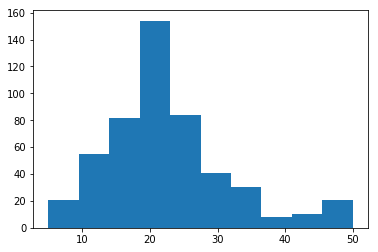

In [12]:
import matplotlib.pyplot as plt
plt.hist(boston.target)

In [13]:
targets['price']=targets.MEDV.map(lambda x: 1 if x > 20 else 0)

In [14]:
targets.price.value_counts()

1    291
0    215
Name: price, dtype: int64

In [15]:
X = features
y = targets['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [152]:
rfc1 = RandomForestClassifier(max_depth=3, max_features=3, max_leaf_nodes=5, 
                              min_samples_leaf=2, min_impurity_split=None, 
                              random_state=1, n_estimators=100)

In [153]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [154]:
list(zip(X.columns, rfc1.feature_importances_))

[('CRIM', 0.0893308239718529),
 ('ZN', 0.0),
 ('INDUS', 0.03862471770739731),
 ('CHAS', 0.0029304221528549624),
 ('NOX', 0.11021494001528055),
 ('RM', 0.08400952436922098),
 ('AGE', 0.12653910156789194),
 ('DIS', 0.021867968786773703),
 ('RAD', 0.00014472008950117235),
 ('TAX', 0.06933187321254276),
 ('PTRATIO', 0.08048454775329252),
 ('B', 0.007533062393702463),
 ('LSTAT', 0.3689882979796888)]

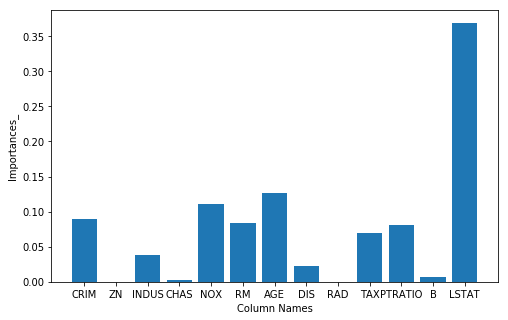

In [155]:
plt.figure(figsize=(8,5))
plt.bar(X.columns, rfc1.feature_importances_)
plt.xlabel('Column Names')
plt.ylabel('Importances_')
plt.show()

In [156]:
train_pred = rfc1.predict(X_train)

In [157]:
y_pred1 = rfc1.predict(X_test)

In [158]:
print(accuracy_score(y_test, y_pred1))

0.8503937007874016


In [159]:
math.sqrt(mean_squared_error(y_pred1, y_test))

0.38678973514378384

In [160]:
print('Train Accuracy : {}'.format(accuracy_score(y_train, rfc1.predict(X_train))))
print('Test Accuracy : {}'.format(accuracy_score(y_test, y_pred1)))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, y_pred1)))

Train Accuracy : 0.899736147757256
Test Accuracy : 0.8503937007874016
Confusion Matrix : [[44 14]
 [ 5 64]]


In [161]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        58
           1       0.82      0.93      0.87        69

   micro avg       0.85      0.85      0.85       127
   macro avg       0.86      0.84      0.85       127
weighted avg       0.86      0.85      0.85       127



In [162]:
probs = rfc1.predict_proba(X_test)

In [163]:
metrics.roc_auc_score(y_test, probs[:,1])

0.923288355822089

- The accuracy of the model is **85%** with 100 estimators.
- RMSE is 0.38
- roc_aur_score of the model is **92.3 %**